# ディープラーニング(MLP)とは？
---
この単元では、ディープラーニング(DL)におけるモデルの学習の仕組みについて学ぶ。

ディープラーニング(DL)の中でも様々なモデルがあり、
* MLP：他のDLのベースとなっているモデル
* CNN：画像分野に特化したモデル
* RNN：自然言語処理に特化したモデル

本講座では、最も基本的なDLモデル **多層パーセプトロン(英：MultiLayer Perceptron , 略称：MLP)** を例に上げて説明する。  
MLPは他のDLのベースとなっているモデルなので、説明するほぼ全ての内容が他のDL手法の基礎的な説明になる。

MLPなどのDLの教師あり学習では4つのフェーズを**繰り返す**ことでパラメータの更新を繰り返し理想のモデルを作り上げている。  
(理想のモデルを作り上げる方法=モデルの学習方法)

1. 順伝播：モデルに対してデータを入力して出力を計算
2. 損失関数：予測結果と理想の結果の差を比較して、モデルがどの程度間違っているか計算
3. 逆伝播：パラメータをどう変化させれば損失が小さくなるか計算
4. 最適化：パラメータを更新してモデルをより良くする

以上の４つについてこれから説明していこう


説明が多い単元になってしまうが、内容が理解できれば、DLプログラミングが容易になるので頑張っていこう！

## この単元の目標

* ディープラーニングの仕組み・概念を学ぼう

  → **MLPの概要を大まかに理解しよう**
  

## MLPの構造
---
まずはMLPのネットワークモデルの例を見てみよう。

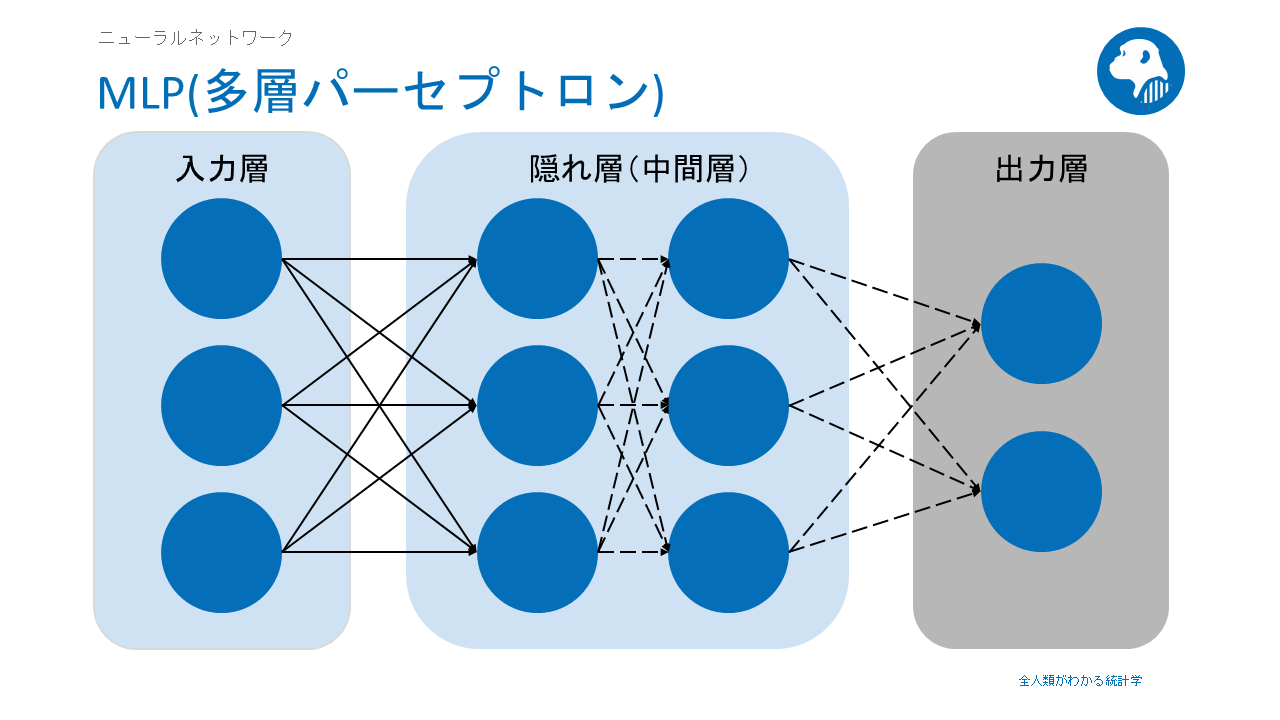

ディープラーニングを学ぶ上で抑えておきたい**5つのキーワード**がある。  
「入力」「出力」「レイヤー（層）」「ノード」「パラメータ」をまず抑えておこう
- 入力
    - 出力を求めるために、MLPに入れる数値やベクトル
    - 訓練時は説明変数にあたる
    - 数十〜数万次元であることが多く、画像や音声などの場合もある
- 出力
    - 入力に対して、MLPが計算して得られた結果
    - 訓練時は目的変数にあたる
    - 1~数百次元であることが多い
- ノード
    - MLPが演算の過程で得られる信号を格納する一つ一つの要素（上図の◯）
    - 入力と出力はそれぞれ入力ノード、出力ノードにあたる
    - 入力ごとに格納される値（信号）は再計算される
- レイヤー(層)
    - ノードがたくさん集まって構成される
    - レイヤーが順番を持って複数個重なってMLPが構成される
    - 順伝播では前のレイヤーの信号がすべて計算されたあとに、それを基に次のレイヤーの信号を計算する。これを繰り返すことで、入力信号から出力信号まで得る。
- パラメータ
    - レイヤー同士の演算を制御している
    - MLP全体で数千〜数百万のパラメータを持つ
    - 訓練前はランダムで初期化されるが、訓練を通して一つずつが最適な値に徐々に変化していく。

MLPは3種類の「**層(レイヤー)**」から成り立っている。
* 入力層 (必ず1層)
* 出力層 (必ず1層)
* 隠れ層(1つ以上の複数の層を持つことができる)

層の中にある円は「**ノード**」と呼ぶ。入力層と出力層のノード数は問題によって一意に決まる。

隠れ層には種類が有り、求める機能によって使い分ける必要がある。よく利用するレイヤー(層)としては
* 全結合層（fc)
* 活性化関数(relu)
* 畳み込み層(conv2d)

などがある。

---
【例題】一つの数字が書かれている「28*28」画素の画像を判別したい場合、入力層と出力層はいくつに設定すべき？

【答え】入力層：784コ、出力層：10コ

【解説】
* 入力層は入力データ１つあたりのサイズで決まる。そのため、28*28=784コ
* 出力層は出力される可能性がある種類の数で決まる。そのため、「0,1,2...8,9」の10コ

## 1. 順伝播（じゅんでんぱ）
---
MLPの第一フェーズ「**順伝播**」について学んでいこう。

順伝播とは、入力側から出力側に一方向に情報を伝播させるという意味で、  
働きは、モデルにデータを入力し、中間層・出力層の演算を経て出力を得ることだ。

---
【例題】１つの数字が書かれている画像を判別するMLPを設計した時、とある数字が書かれた画像を入力するとどのような出力が得られるか？

【答え】「0である確率：a%, 1である確率：b%, 2である確率：c%,     ...   
　　　　　　　　　　　　　　　　　　　　　　　　　　　　　　...  8である確率：i%, 9である確率：j%」のような出力が得られるイメージ

【解説】
* それぞれのノードに数字ごとの確率が出力されるイメージを持つとよい。
---


実際に、ネットワークモデルがどのような計算をしているのか見て順伝播のイメージを掴もう。

### 全結合層(Affine Layer)
全結合層：レイヤー間の全てのノードの結合を行う層  
ネットワークモデルと計算式は以下の画像のようになる。イメージを掴もう。

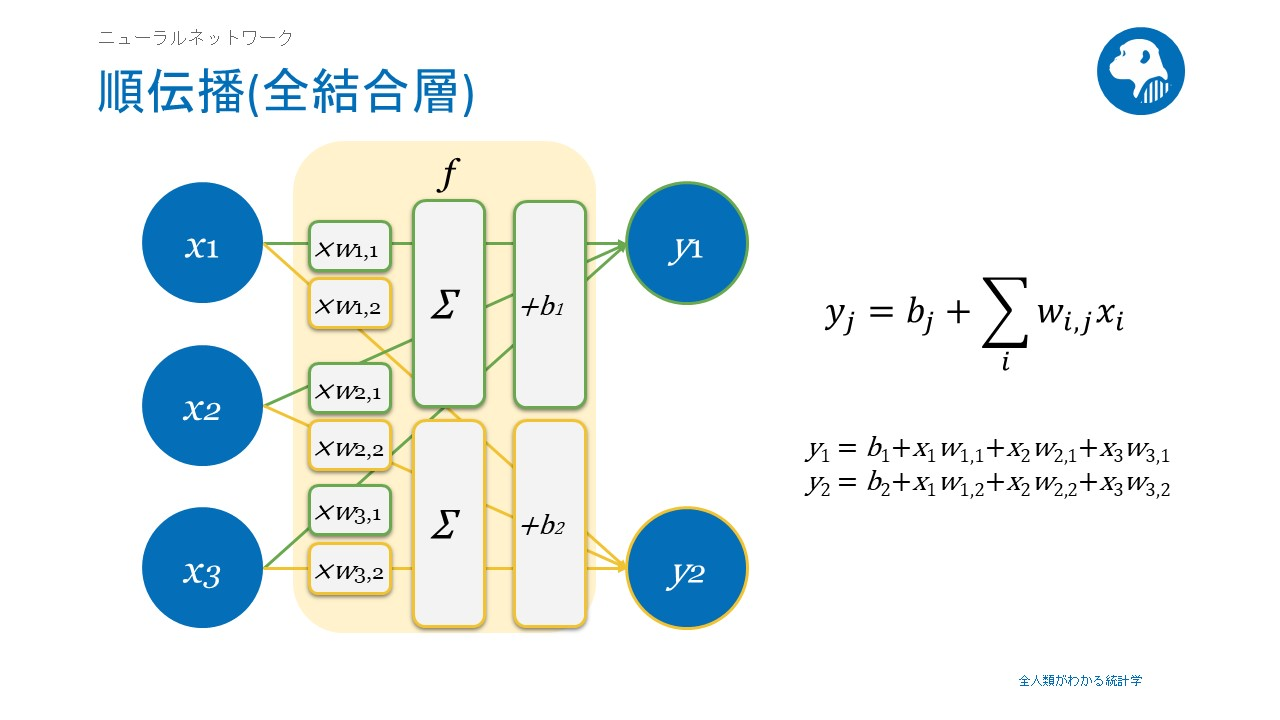

結合の際に起こる演算は、左のノード（x）とパラメータ(w, b)を使うことで右のノード（y）を算出できる。
* 計算式は至ってシンプルだ！上記の画像の計算式を参考にしよう

これを層から層へ順に繰り返すことで、情報が伝播していくイメージができるだろうか？これが順伝播だ！

また、パラメータの初期値はランダムで与えられるため、初回の出力はあべこべなものになる。

「モデルチューニング」では全結合層以外の層(レイヤー)についても紹介するぞ。

### 活性化関数
全結合層だけの順伝播ではモデルの表現力が低い。
* 線形モデルしか表現できない

そこで、モデルの表現力を高めるために利用するのが**活性化関数**だ。
* 活性化関数を利用することで非線形モデルを表現できるようになる

以下の画像を上記の画像と見比べてみよう。

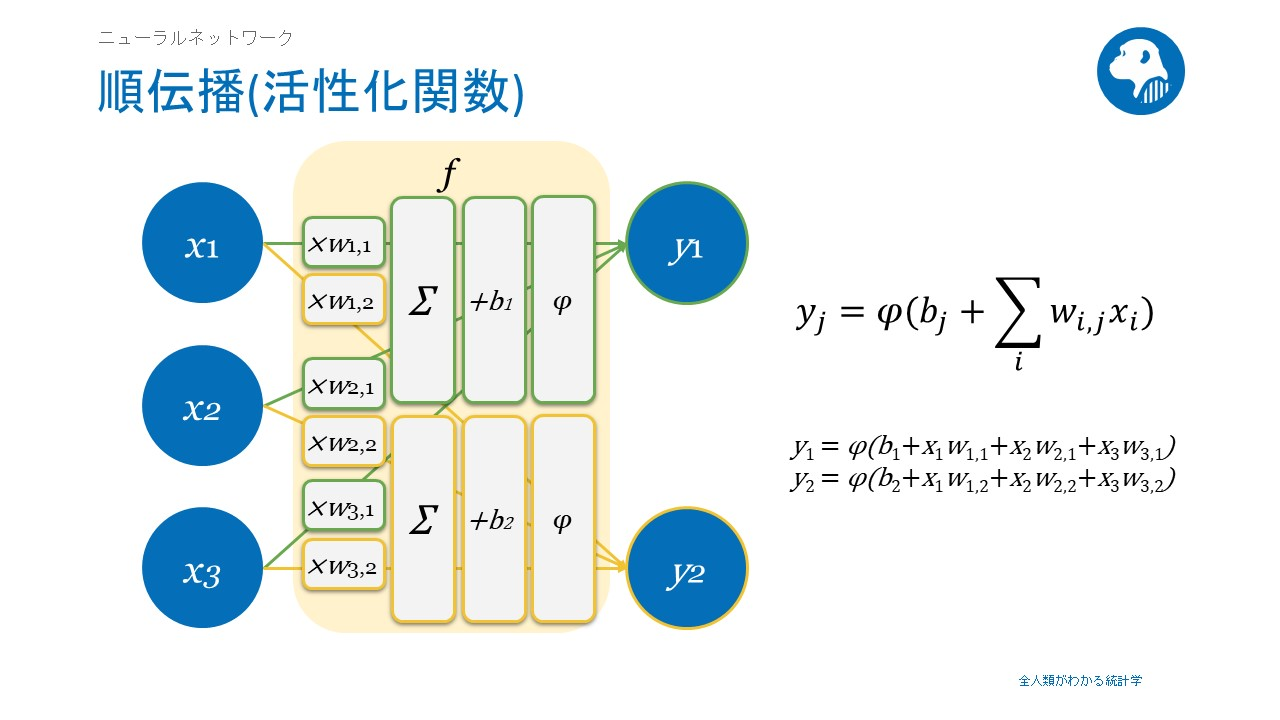

「**φ**」に当たるものが活性化関数だ。

全結合層によって結合されたデータを活性化関数によって変換する。  
このように、全結合層と活性化関数のセットを複数重ねることでモデル全体が構成され、  
入力層から順に演算していくことがモデルの順伝播になる。

「モデルの実装と学習」で最もよく利用する活性化関数**ReLU**について紹介しよう。  
「モデルチューニング」では他の活性化関数についても詳しく紹介するぞ。

## 2. 損失関数
---
MLPの第二フェーズ「**損失関数**」について学んでいこう。

まず**損失**とは、順伝播で求めた結果と**理想の結果**の差を定量的に表したもので、損失はモデルにつけられた評価点と考えることができる。  
つまり、モデルをより良くする指針が**損失**で、損失を小さくすること(0に近づけること)がモデルをより良くすることと言える。  

---
【例題】１つの数字が書かれている画像を判別するMLPに、「0」が書かれた画像を入力した理想の結果(出力)はどのようになる？

【答え】「0である確率：100%, 1である確率：0%, 2である確率：0%,     ...   ...  8である確率：0%, 9である確率：0%」  
のように正解の数字は100%それ以外は全て0%と出力されるのが理想。

---
上記のような理想の出力と順伝播で求めた出力の値を利用し**損失**を求める関数が**損失関数**と呼ばれる。

損失関数は目的・対象によって選定する必要があり、よく利用されるのは
* MSE(平均２乗誤差)
* クロスエントロピー

と呼ばれるものだ。使い方は「モデルの実装と学習」で、詳細は「モデルチューニング」で再度紹介するぞ！

## 3. 逆伝播(ぎゃくでんぱ)
---
MLPの第三フェーズ「**逆伝播**」について学んでいこう。  
逆伝播では、損失を小さくするにはパラメータをどう変化させるのが良いか知るため、パラメータごとの**勾配**を算出する。

**勾配**とは、関数の傾きを表しており、微分にて求めることができる。

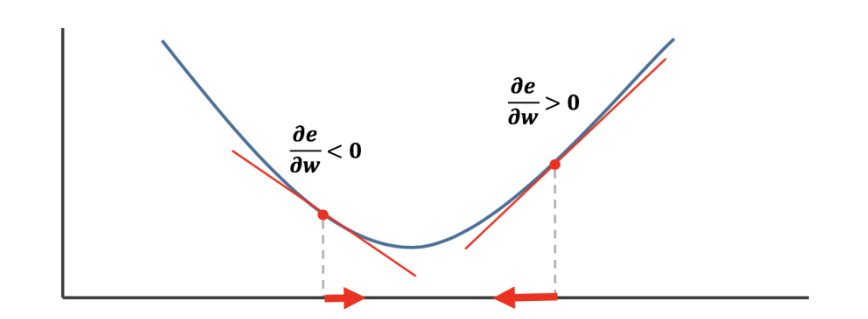

パラメータに対するコスト関数の勾配（微分）がわかれば、パラメータをどう更新すれば損失が小さくなるかわかる。
* 勾配が正の数の場合：パラメータを小さくすると損失が小さくなる
* 勾配が負の数の場合：パラメータを大きくすると損失が小さくなる

逆伝播で行う微分の計算は非常に複雑で時間がかかる。  
しかし、PyTorchでは自動で勾配をもとめる機能があるため、難しい計算は覚える必要なく、後に紹介する一行のコードで実行可能だ！！

逆伝播と呼ばれているわけは、勾配を算出する順番が順伝播と逆方向（出力層から入力層へ）に行われるためだ。

## 4. 最適化
---
MLPの第四フェーズ「**最適化**」について学んでいこう。

最適化とは、モデルをより良くするためにパラメータの更新を行うことだ。  
つまり、逆伝播で求めた勾配情報を利用して損失が小さくなるようにパラメータを変化させることと言えるだろう。  
最適化をすることで、次回の順伝播の結果が改善されるはずだ！


しかし、パラメータをどのくらいのスケール変化させればよいのだろうか？   
方向が既知でも、一回の更新で変化の度合いが大きすぎると最適解を超えてしまう。しかし、逆に小さすぎると学習がほとんど進まない。  
ここでまずパラメータを変化の幅を決めるパラメータを**学習率(learning rate)**と呼ぶ。

学習率の大きさによって関数の収束の様子が違ってくる。下のアニメーションを見比べてみよう。

| 学習率小さい     | 学習率が適切    | 学習率が大きい    | 
|:---------------:|:--------------:|:--------------:|
| 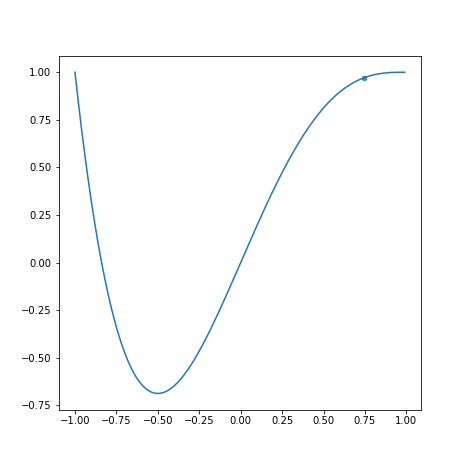  | 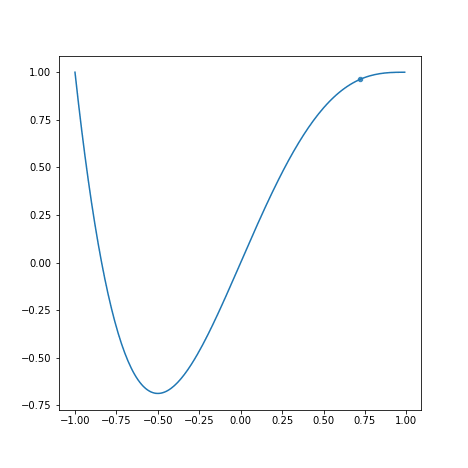 | 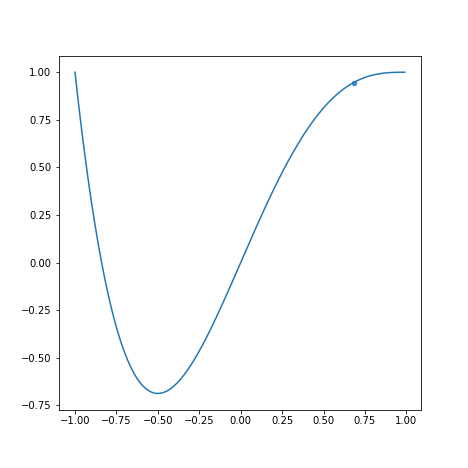 |

学習率を適切に設定できていない場合
* 収束に時間がかかる、振動する
* 収束せずに発散する

などが起きてしまう

**学習率**は我々人間が経験と試行錯誤で設定する必要があるので一概には言えないが、各最適化手法でおおよその値が提案されることが多い。

最も利用されている最適化手法は **Adam** だ！「モデルの実装と学習」で使い方を学ぶぞ！  
「モデルチューニング」で他の最適化手法についても少し詳しく紹介しよう。

## ハイパーパラメータ

**学習率**ような、「人が決めるパラメータ」を**ハイパーパラメータ**と呼ぶ。  
DLで定める代表的なハイパーパラメータは他にも、
* バッチサイズ
* epoch数（学習のループ数）
* モデルの構造

などがあげられる。どれも学習の進行に大きく影響するため一つずつ説明する。

### バッチサイズ
以下の画像を用いて説明する。以下の画像には72コのデータがある。  
* バッチ(batch)とは、データ全体のことを指す。  
* ミニバッチとは、バッチの中に存在する小さな群のことを指す。  
* バッチサイズ(batch size)とは、**ミニバッチ**の群の中にいくつデータが含まれているかの大きさを表す。

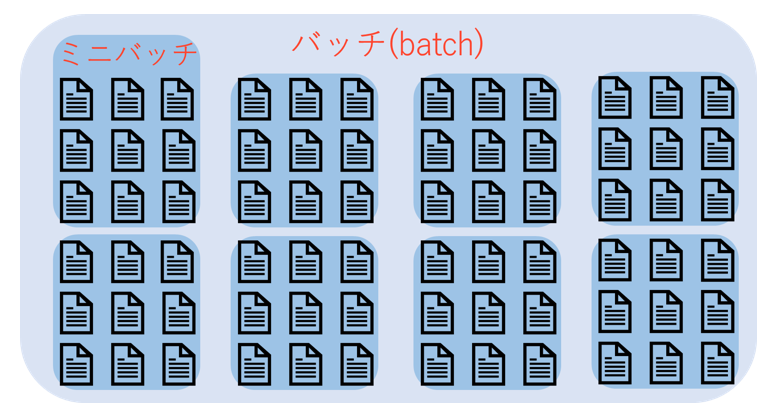

このバッチサイズは、最適化つまり、重みの更新をどのくらいの頻度で行うかを指定することができる。

* バッチサイズが大きい
    * 学習に与える影響：個々のデータが与える影響は相対的に小さく、間違った方向に学習をすすめる可能性は極めて小さい
    * 学習速度：パラメータの更新回数が少なくなり、計算量からみる学習速度は相対的に遅くなる

* バッチサイズが小さい
    * 学習に与える影響：個々のデータが与える影響は相対的に大きく、間違った方向に学習をすすめる可能性が増大
    * 学習速度：パラメータの更新回数が多くなるため、計算量からみる学習速度は相対的に速くなる

バッチサイズを適当に定めることができると上手く学習が進むだろう！

### epoch(エポック)数
epoch数とは学習を何ループしたかの数にあたる。

1バッチ学習したことを1epochと呼ぶ。(バッチサイズによる更新頻度は考慮しない)

1epoch学習して十分ということはないため、数epoch～数十epoch回すこととなるだろう。  
何周が適当なのかは実際に試して見ないとわからない。過学習したら打ち切ろう。

### モデルの構造
全結合層や活性化関数、損失関数、最適化関数には様々な種類がある。  
これらを組み合わせてより良いモデルの構造を定義しよう。  
モデルの構造も「人が決めるパラメータ」のため**ハイパーパラメータ**だ！



## まとめ
機械学習の「3.モデルの学習」にあたる、ディープラーニング(MLP)のおおまかな概念について学んだ。

機械学習は一般に４つの手順を踏む。

1. アルゴリズムの選択
2. 前処理
3. モデルの学習
4. 評価・検証

MLPなどのDLの教師あり学習では4つのフェーズを**繰り返す**ことでパラメータの更新を繰り返し「3.モデルの学習」をしている。

1. 順伝播：モデルに対してデータを入力して出力を計算
2. 損失関数：予測結果と理想の結果の差を比較して、モデルがどの程度間違っているか計算
3. 逆伝播：パラメータをどう変化させれば損失が小さくなるか計算
4. 最適化：パラメータを更新してモデルをより良くする

実装時には上手く学習が進むよう**ハイパーパラメータ**にも注意する必要がある


## 次単元からの内容
「3.モデルの学習」の説明はこれにて終了。

次の単元からは、ディープラーニングライブラリPyTorchについて、その特徴やメリットを学び、ディープラーニングモデルの実装を学んでいくぞ！